### # Problem Statement --> Predict Gender Using Dental Metrics

   ### Step 1. Import basic Python Liabrary

In [263]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2. Loading dataset 

In [264]:
df=pd.read_csv("Dentistry Dataset.csv")

In [265]:
df.shape

(1100, 14)

### Step 3. Data Preprocessing

In [266]:
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [267]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl No,1100.0,550.500000,317.686953,1.000,275.7500,550.500,825.25000,1100.000
Sample ID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1100.0,21.625455,2.085892,18.000,20.0000,22.000,23.00000,25.000
inter canine distance intraoral,1100.0,25.989009,1.315292,23.120,25.0000,25.900,26.99250,30.310
intercanine distance casts,1100.0,25.880082,1.862323,6.540,24.9800,25.900,27.00000,30.310
right canine width intraoral,1100.0,6.563000,0.379035,5.460,6.2900,6.520,6.80250,7.610
right canine width casts,1100.0,6.564491,0.377553,5.460,6.3000,6.520,6.80250,7.600
left canine width intraoral,1100.0,6.669627,0.375841,5.460,6.4000,6.660,6.91000,7.810
left canine width casts,1100.0,6.675018,0.377098,5.460,6.4075,6.680,6.92000,7.810
right canine index intra oral,1100.0,0.253122,0.015344,0.223,0.2420,0.253,0.26200,0.363


In [268]:
df.dtypes

Sl No                                int64
Sample ID                          float64
Age                                  int64
Gender                              object
inter canine distance intraoral    float64
intercanine distance casts         float64
right canine width intraoral       float64
right canine width casts           float64
left canine width intraoral        float64
left canine width casts            float64
right canine index intra oral      float64
right canine index casts           float64
left canine index intraoral        float64
left canine index casts            float64
dtype: object

### Step 4. Checking for missing values

In [269]:
df.isnull().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

### There is no Missing values other than Sample ID column(column WIth no values)

 As there are no missing values in our dataset we are going forword to drop unwanted columns

### Step 5. Droping Unwanted Columns
#### Lets drop the Sample ID column as there is no values in Sample ID column & also it is not required for further analysis

In [270]:
df=df.drop(['Sample ID','Sl No'],axis=1)

### Data after droping unwanted column

In [271]:
df.sample(5)

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
493,24,Female,28.75,28.75,6.69,6.69,6.69,6.69,0.233,0.233,0.233,0.232
392,18,Female,26.78,26.78,6.40,6.40,6.40,6.40,0.239,0.239,0.239,0.239
447,20,Female,23.88,23.87,6.16,6.16,6.16,6.17,0.332,0.258,0.258,0.257
381,21,Female,25.07,25.07,6.17,6.17,6.18,6.18,0.246,0.246,0.246,0.246
219,18,Female,25.81,25.81,6.60,6.63,6.63,6.63,0.255,0.256,0.256,0.256


#

### Handling Outliers

<Axes: xlabel='Age'>

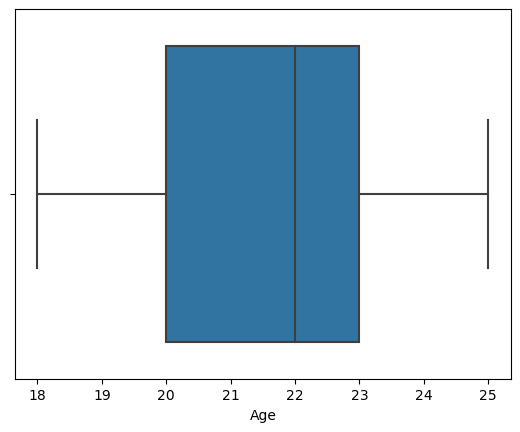

In [272]:
sns.boxplot(x="Age",data=df)

### No outliers in Age column

#### Removing outliers from column 'inter canine distance intraoral'

In [273]:
# Detecting outlier using IQR
Q1=25.0000
Q3=26.99250
IQR = Q3 - Q1

In [274]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(22.01125, 29.98125)

In [275]:
df =df[(df['inter canine distance intraoral'] > lower_limit) & (df['inter canine distance intraoral'] < upper_limit)]
df

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


<Axes: xlabel='inter canine distance intraoral'>

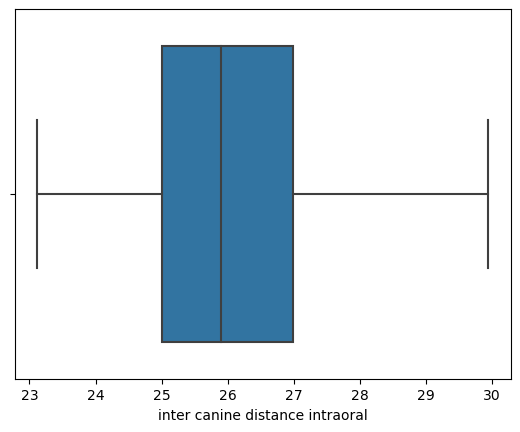

In [276]:
sns.boxplot(x="inter canine distance intraoral",data=df)

### Similarly removing outlier for all the column

#### Removing Outliers from column 'intercanine distance casts'

In [277]:
Q1=24.9800
Q3=27.00000
IQR = Q3 - Q1

In [278]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(21.950000000000003, 30.03)

In [279]:
df =df[(df['intercanine distance casts'] > lower_limit) & (df['intercanine distance casts'] < upper_limit)]
df

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


#### #After removing outliers from intercanine distance casts

<Axes: xlabel='intercanine distance casts'>

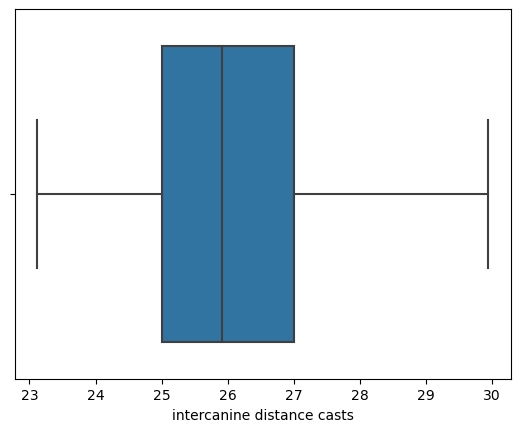

In [280]:
sns.boxplot(x='intercanine distance casts',data=df)

#### #Remove Outliers from column 'right canine width intraoral'

In [281]:
Q1=6.2900
Q3=6.80
IQR = Q3 - Q1

In [282]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(5.525, 7.5649999999999995)

In [283]:
df =df[(df['right canine width intraoral'] > lower_limit) & (df['right canine width intraoral'] < upper_limit)]
df

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


#### #After removing outliers from right canine width intraoral

<Axes: xlabel='right canine width intraoral'>

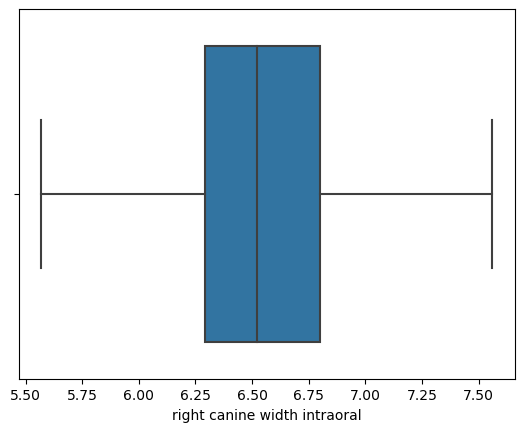

In [284]:
sns.boxplot(x='right canine width intraoral',data=df)

####  #Remove Outliers from right canine width casts

In [285]:
Q1=6.30
Q3=6.80
IQR = Q3 - Q1

In [286]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(5.55, 7.55)

In [287]:
df =df[(df['right canine width casts'] > lower_limit) & (df['right canine width casts'] < upper_limit)]
df

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


#### #After removing outliers from right canine width casts

<Axes: xlabel='right canine width casts'>

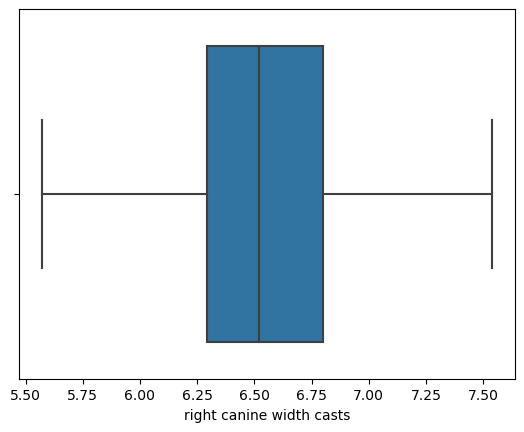

In [288]:
sns.boxplot(x='right canine width casts',data=df)

#### # Remove Outliers from Column left canine width intraoral

In [289]:

Q1=6.40
Q3=6.91
IQR = Q3 - Q1

In [290]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(5.635000000000001, 7.675)

In [291]:
df =df[(df['left canine width intraoral'] > lower_limit) & (df['left canine width intraoral'] < upper_limit)]
df

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


#### # After removing outliers from left canine width intraoral

<Axes: xlabel='left canine width intraoral'>

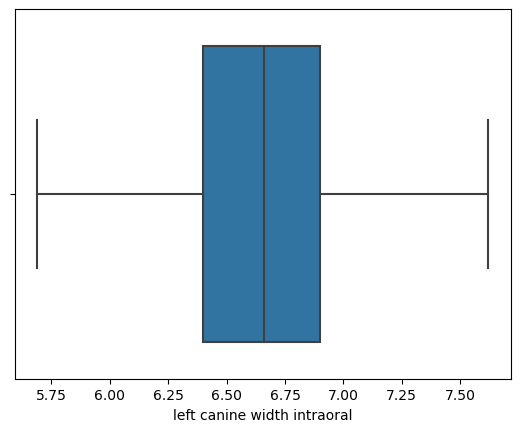

In [292]:
sns.boxplot(x='left canine width intraoral',data=df)

#### #Remove outliers from column left canine width casts

In [293]:
Q1=6.4075
Q3=6.92
IQR = Q3 - Q1

In [294]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(5.63875, 7.688750000000001)

In [295]:
df =df[(df['left canine width casts'] > lower_limit) & (df['left canine width casts'] < upper_limit)]
df

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


#### #After removing Outliers from left canine width casts

<Axes: xlabel='left canine width casts'>

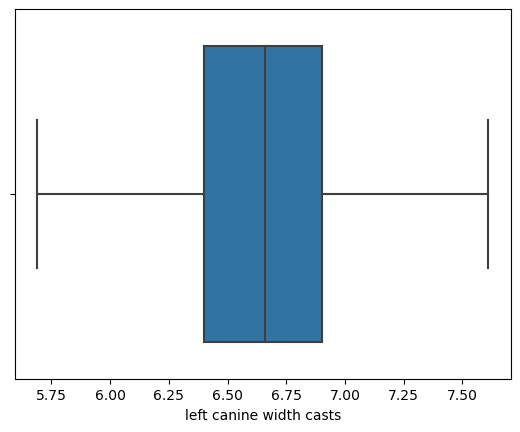

In [296]:
sns.boxplot(x='left canine width casts',data=df)

#### # Remove outliers from column 'right canine index intra oral'

In [297]:
Q1=0.2420
Q3=0.2602
IQR = Q3-Q1

In [298]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(0.2147, 0.2875)

In [299]:
df =df[(df['right canine index intra oral'] > lower_limit) & (df['right canine index intra oral'] < upper_limit)]
df

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


#### #After removing Outliers from column right canine index intra oral

<Axes: xlabel='right canine index intra oral'>

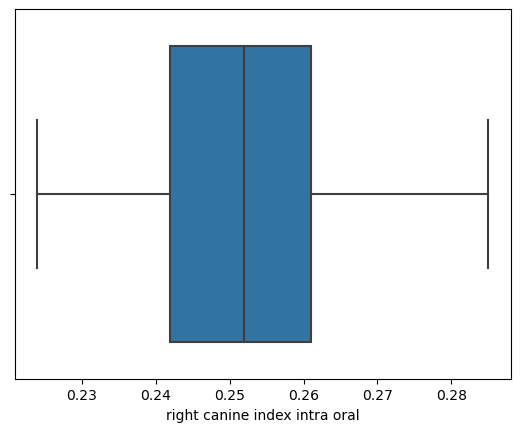

In [300]:
sns.boxplot(x='right canine index intra oral',data=df)

#### #Remove outliers from column right canine index casts

In [301]:
Q1=0.2420
Q3=0.26125
IQR = Q3-Q1

In [302]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(0.213125, 0.29012499999999997)

In [303]:
df =df[(df['right canine index casts'] > lower_limit) & (df['right canine index casts'] < upper_limit)]
df

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


#### # After removing outliers from right canine index casts

<Axes: xlabel='right canine index casts'>

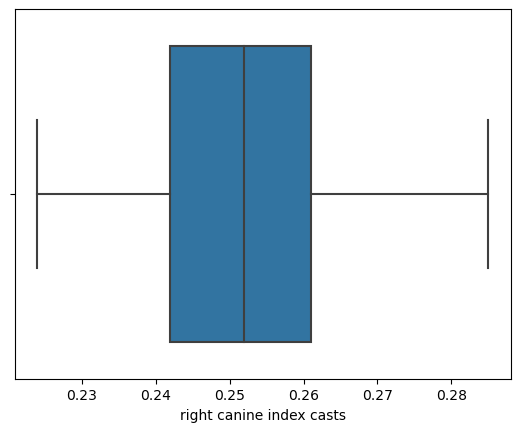

In [304]:
sns.boxplot(x='right canine index casts',data=df)

#### #Remove outliers from column left canine index intraoral

In [305]:
Q1=0.2470
Q3=0.26425
IQR = Q3-Q1

In [306]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(0.22112500000000002, 0.29012499999999997)

In [307]:
df =df[(df['left canine index intraoral'] > lower_limit) & (df['left canine index intraoral'] < upper_limit)]
df

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


#### # After removing Outliers from left canine index intraoral

<Axes: xlabel='left canine index intraoral'>

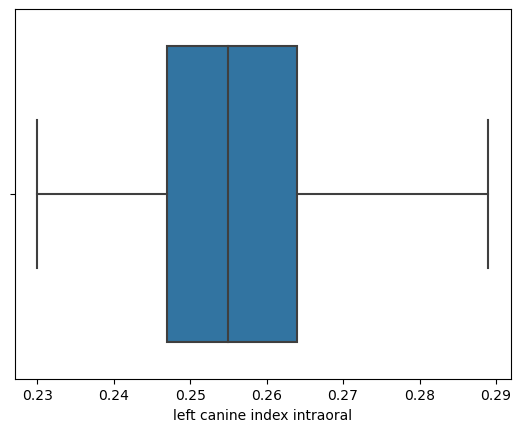

In [308]:
sns.boxplot(x='left canine index intraoral',data=df)

#### #remove Outliers from column left canine index casts

In [309]:
Q1=0.2470
Q3=0.2640
IQR = Q3-Q1

In [310]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(0.22149999999999997, 0.28950000000000004)

In [311]:
df =df[(df['left canine index casts'] > lower_limit) & (df['left canine index casts'] < upper_limit)]
df

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


#### # After removing outliers from left canine index casts

<Axes: xlabel='left canine index casts'>

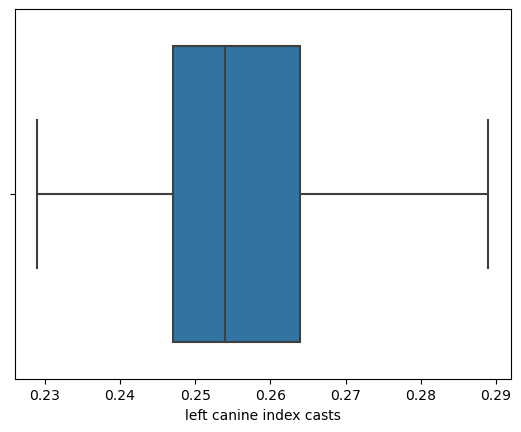

In [312]:
sns.boxplot(x='left canine index casts',data=df)

In [313]:
df.shape

(1051, 12)

### #Encoding categorical data i.e, Gender

In [314]:
# import required Library
from sklearn.preprocessing import LabelEncoder

In [315]:
# Lets fit and transform the Gender column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [316]:
df["Gender"].unique()

array([0, 1])

#### # Data after Encoding catagorical data

In [317]:
df.sample(5)

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
325,22,0,26.28,26.28,6.49,6.49,6.70,6.70,0.249,0.249,0.255,0.255
250,21,0,27.25,27.25,6.88,6.88,6.90,6.89,0.252,0.252,0.252,0.253
890,18,1,28.23,28.23,6.76,6.76,6.91,6.91,0.238,0.238,0.243,0.243
359,20,0,25.33,25.33,6.77,6.77,6.81,6.81,0.267,0.267,0.269,0.269
1066,24,1,24.34,24.34,6.49,6.49,6.70,6.70,0.267,0.267,0.275,0.275


### #Split independent and dependent variables i.e. X and Y

In [318]:
# Code to find dependant variable(targeted variable) and independent variable(featured variable)
X = df.drop(['Gender'], axis=1)
y = df['Gender']


In [319]:
X

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...
1095,24,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [320]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1095    1
1096    1
1097    1
1098    1
1099    1
Name: Gender, Length: 1051, dtype: int32

### #Normalize the X variable

In [321]:
#Import required library
from sklearn.preprocessing import Normalizer

In [322]:
normalizer = Normalizer()
X_normal = normalizer.fit_transform(X)

In [323]:
X_normal

array([[0.53936387, 0.56318578, 0.56296104, ..., 0.00543859, 0.00543859,
        0.00541611],
       [0.49575982, 0.58094037, 0.58116571, ..., 0.00534069, 0.00556603,
        0.00556603],
       [0.53997057, 0.55945646, 0.55945646, ..., 0.00582229, 0.00619792,
        0.00619792],
       ...,
       [0.56255031, 0.54544878, 0.54544878, ..., 0.00612055, 0.00612055,
        0.00612055],
       [0.48779774, 0.57769189, 0.57769189, ..., 0.00613231, 0.006202  ,
        0.006202  ],
       [0.52715664, 0.56176562, 0.56176562, ..., 0.00593624, 0.00632588,
        0.00632588]])

### # Exploratory Data Analysis

In [324]:
# Correlation matix
corr=df.corr()

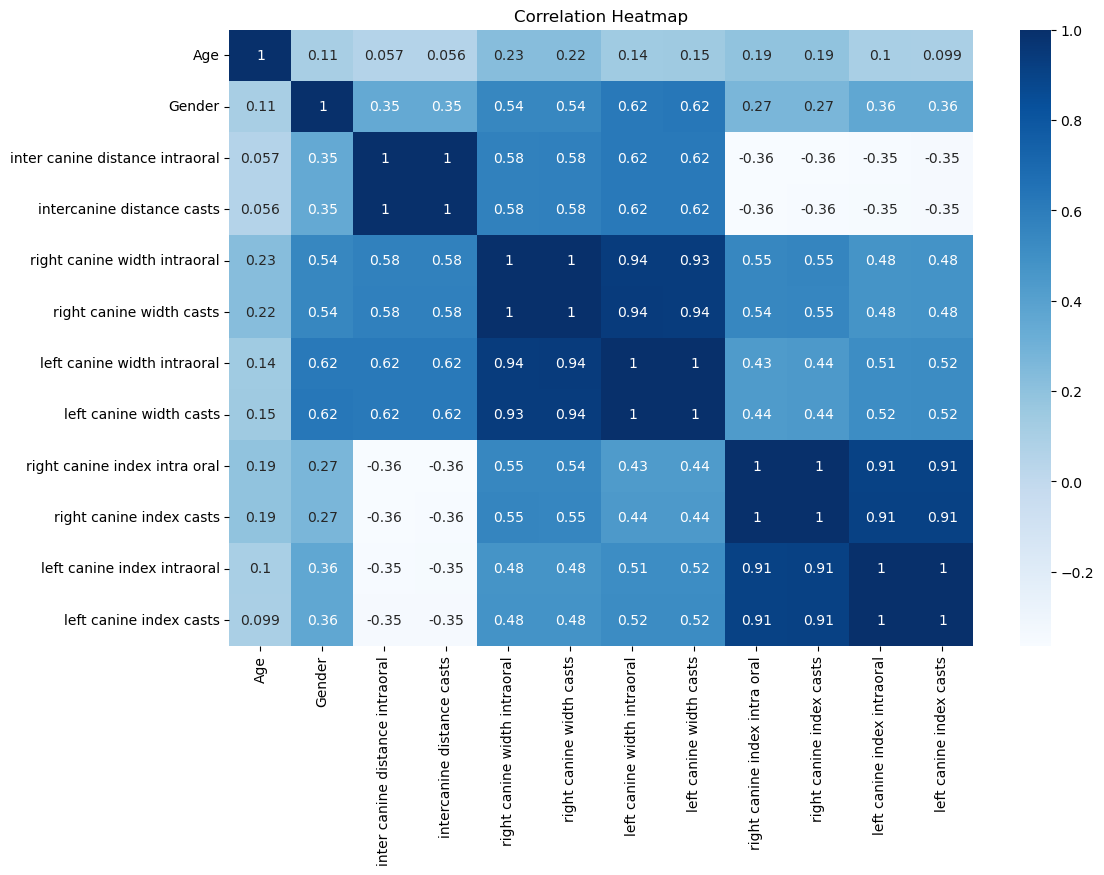

In [325]:
# Generating heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

### # Model Buiding

In [326]:
# importing Required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [327]:
# split Data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_normal,y,test_size = 0.30)

### #Logistic Regression Model

In [328]:
# Train Logistic Regression model

In [329]:
LR_model= LogisticRegression()
LR_model.fit(X_train,y_train)

LogisticRegression()

In [330]:
# Predict and evaluate the Logistic Regression model

In [331]:
y_predict_LR = LR_model.predict(X_test)
LR_accuracy = accuracy_score(y_test,y_predict_LR)
LR_accuracy

0.5126582278481012

In [332]:
# Evaluation of model
confusion_matrix(y_test,y_predict_LR)

array([[129,  32],
       [122,  33]], dtype=int64)

### # Decision Tree Classifier

In [333]:
# train Decision tree model

In [334]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [335]:
# Predict and evaluate the Decision tree model

In [336]:
y_pred_DT = decision_tree.predict(X_test)
DT_accuracy = accuracy_score(y_test,y_pred_DT)
DT_accuracy

0.8607594936708861

In [337]:
# Train Random forest Classifier model

In [338]:
Rdm_forest = RandomForestClassifier()
Rdm_forest.fit(X_train,y_train)

RandomForestClassifier()

In [339]:
#Predict and evaluate Random forrest classifier model

In [340]:
y_pred_RF = Rdm_forest.predict(X_test)
RF_accuracy = accuracy_score(y_test,y_pred_RF)
RF_accuracy

0.8734177215189873

In [341]:
#Train XGBoost Classifier model

In [342]:
XGB_class = XGBClassifier()
XGB_class.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [343]:
#Predict and evaluate XGBoost Classifier model

In [344]:
y_pred_XGB = XGB_class.predict(X_test)
XGB_accuracy = accuracy_score(y_test,y_pred_XGB)
XGB_accuracy

0.870253164556962

In [356]:
# Define a function to plot ROC curve
def plot_roc_curve(y_test, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name}')
    plt.show()

In [357]:
# Evaluate Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_predict_LR)

In [358]:
conf_matrix_logistic

array([[129,  32],
       [122,  33]], dtype=int64)

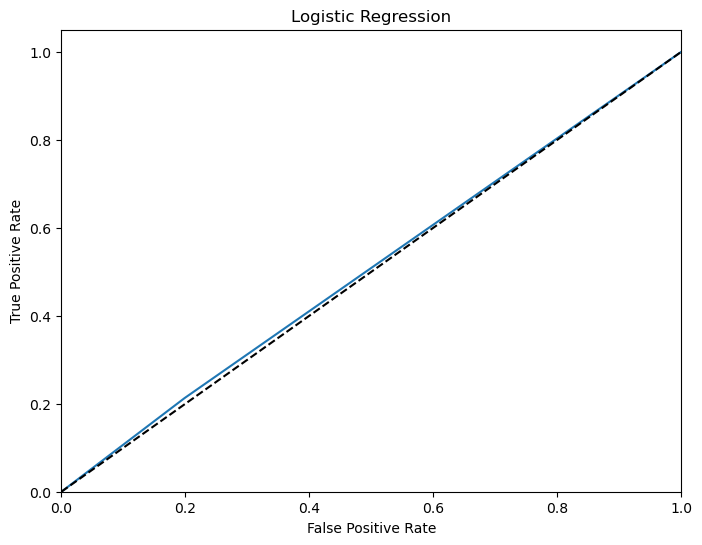

In [359]:
plot_roc_curve(y_test, y_predict_LR, 'Logistic Regression')

In [362]:
# Evaluate Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_DT)
conf_matrix_tree

array([[142,  19],
       [ 25, 130]], dtype=int64)

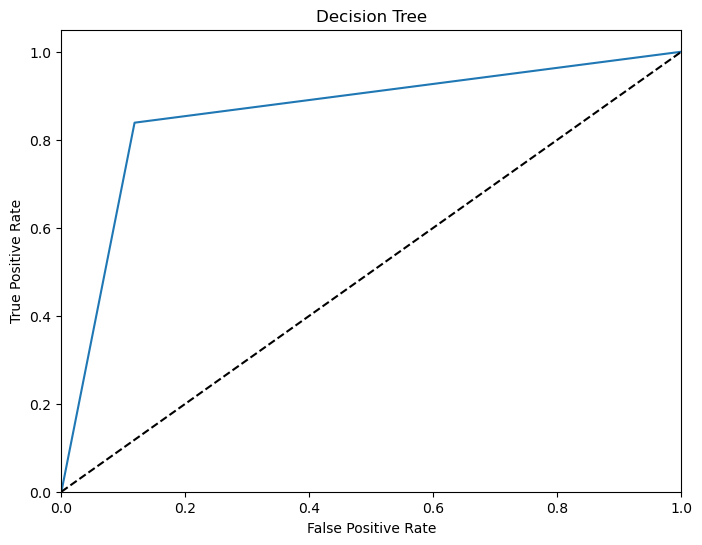

In [363]:
plot_roc_curve(y_test, y_pred_DT, 'Decision Tree')

In [366]:
# Evaluate Random Forest
conf_matrix_forest = confusion_matrix(y_test, y_pred_RF)
conf_matrix_forest

array([[144,  17],
       [ 23, 132]], dtype=int64)

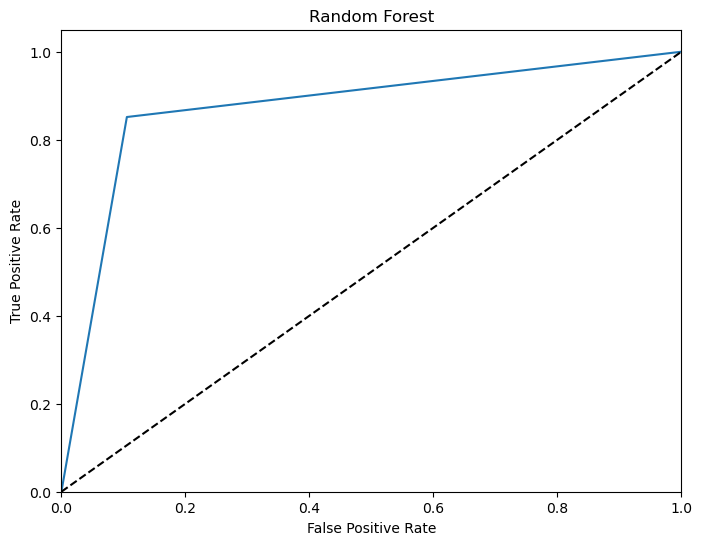

In [367]:
plot_roc_curve(y_test, y_pred_RF, 'Random Forest')

In [369]:
# Evaluate XGBoost
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_XGB)
conf_matrix_xgboost

array([[145,  16],
       [ 25, 130]], dtype=int64)

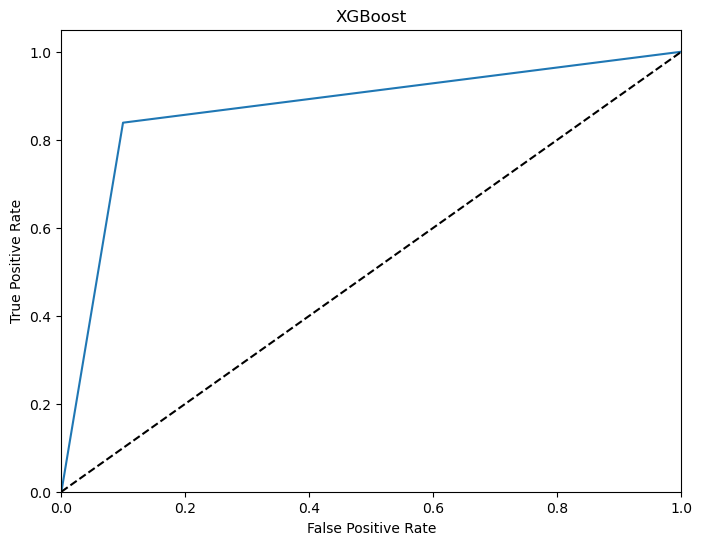

In [370]:
plot_roc_curve(y_test, y_pred_XGB, 'XGBoost')

# Conclusion :

### After comparing the Area Under the Curve(AUC) Values
### Logistic Regression = 0.51
### Decision Tree = 0.86
### Random Forest = 0.87
### XGBoost = 0.87

### Higher the AUC Value, Better the model is:
### In this case Random Forest ROC curve and XGBoost ROC curve is the Best....! 